In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import gamma, gengamma

import pcms.tree
import utils

In [2]:
n_samples = 100000
n_leaves = 500

draw_ = utils.draw_epl(n_samples=n_samples, n_leaves=n_leaves)

In [3]:
# draw = np.log(draw_  / utils.exp_epln_exact(n_leaves))
draw = draw_ / utils.exp_epln_exact(n_leaves)

In [4]:
n_bins = 100
hist, bins = np.histogram(draw, bins=n_bins, density=True)
centers = (bins[:-1] + bins[1:]) / 2

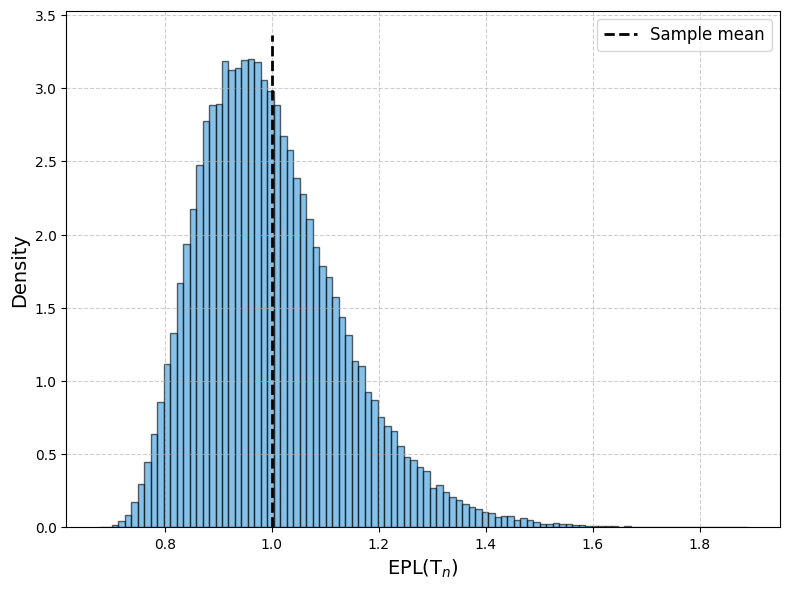

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(draw, bins=n_bins, density=True, alpha=0.6, color='#3498db', edgecolor='black')

ax.vlines(np.mean(draw), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='--', lw=2, color='black', label='Sample mean')

ax.set_xlabel(r'$\mathrm{EPL}(\mathrm{T}_n)$', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

plt.show()

In [6]:
shape = utils.exp_epln_exact(n_leaves)**2 / utils.var_epl_exact(n_leaves)
scale = 1 / shape
print(f"Shape: {shape}, Scale: {scale}")

Shape: 55.08502213999343, Scale: 0.018153755070817502


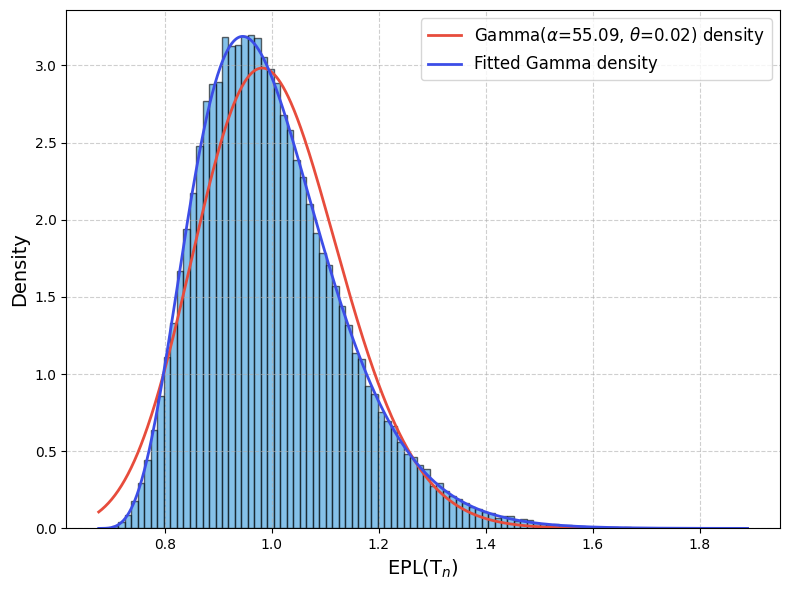

In [8]:
xvals = np.linspace(bins[0], bins[-1], 1000)
gamma_pdf = gamma.pdf(xvals, shape, scale=scale)
fitted_gamma_pdf = gamma.pdf(xvals, *gamma.fit(draw))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(draw, bins=n_bins, density=True, alpha=0.6, color='#3498db', edgecolor='black')
ax.plot(xvals, gamma_pdf, color='#e74c3c', lw=2, label=rf"Gamma($\alpha$={shape:.2f}, $\theta$={scale:.2f}) density")
ax.plot(xvals, fitted_gamma_pdf, color="#3c4de7", lw=2, label=rf"Fitted Gamma density")
ax.set_xlabel(r'$\mathrm{EPL}(\mathrm{T}_n)$', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

plt.show()